(500.0, 700.0)

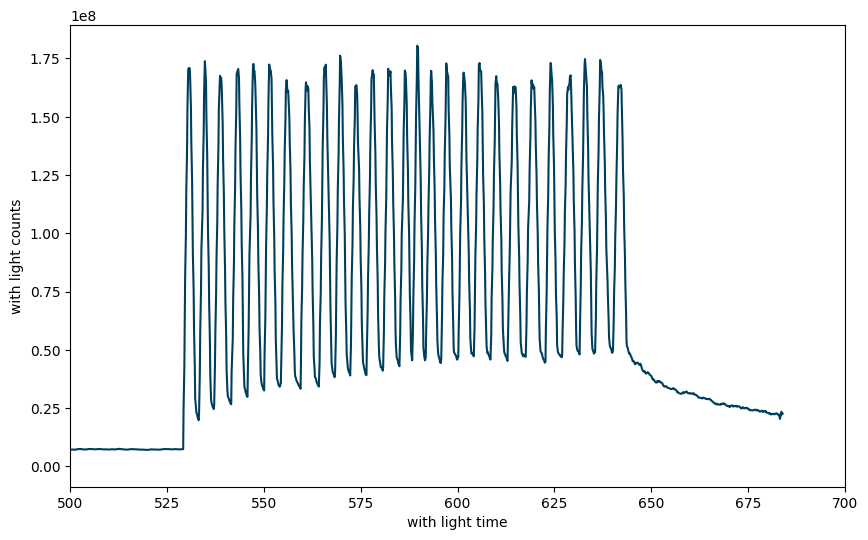

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/alanwortman/Desktop/Grad School/Stephenson/Droplet Microfluidics/Experimental Data/Reactions/1 Analyte Trifluoromethylation/Proof of concept trifluoromethylation/1,3,5-trimethoxybenzene trifluoromethylation no light.csv")
df.head()

plt.figure(figsize = (10,6)) 
ax = plt.subplot()
sns.lineplot(data = df, x = df["with light time"], y = df["with light counts"], color = '#003f5c')
ax.set_xlim(500,700)
# plt.show()


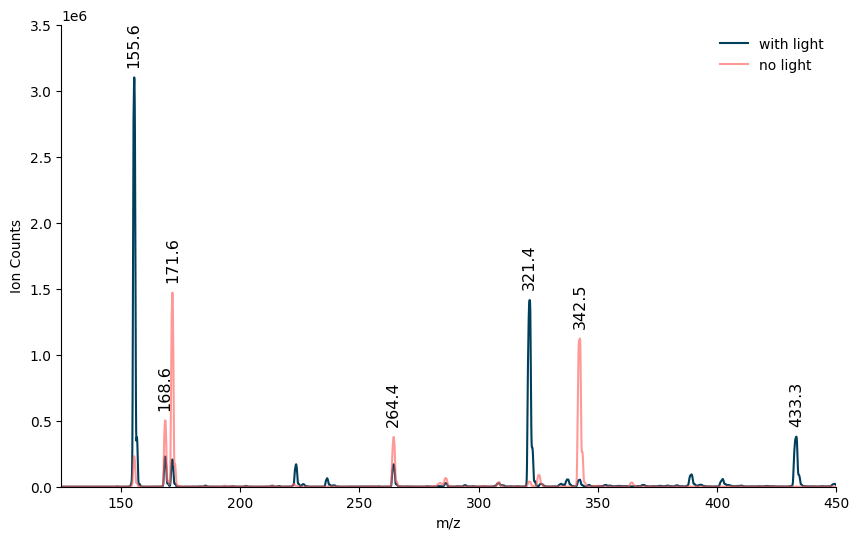

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

df_light = pd.read_csv("/Users/alanwortman/Desktop/Grad School/Stephenson/Droplet Microfluidics/Experimental Data/Reactions/1 Analyte Trifluoromethylation/Proof of concept trifluoromethylation/Trifluoromethylation with light Mass Spectrum.csv")

plt.figure(figsize = (10,6))
ax = plt.subplot()
sns.lineplot(data = df_light, x = df_light["m/z"], y = df_light["ion counts"], label = "with light", color = '#003f5c')

with_light_peaks = find_peaks(df_light["ion counts"], height = 0.05e6) #Outcome is a tubple with an array of the peaks and their heights as a dictionary object
heights = with_light_peaks[1]['peak_heights'] #List of all the peak heights
position = df_light["m/z"][with_light_peaks[0]] #List of all the peaks positions

df_no_light = pd.read_csv("/Users/alanwortman/Desktop/Grad School/Stephenson/Droplet Microfluidics/Experimental Data/Reactions/1 Analyte Trifluoromethylation/Proof of concept trifluoromethylation/1,3,5-trimethoxybenzene Trifluoromethylation no light Mass Spectrum.csv")
sns.lineplot(data = df_no_light, x = df_no_light["no light m/z"], y = df_no_light["no light ion counts"], label = "no light", color = "#ff6361", alpha = 0.65)
ax.set_xlim(125, 450)
ax.set_ylim(0, 3.5e6)

ax.set_ylabel('Ion Counts')
plt.legend(frameon = False)
sns.despine(right = True)


with_light_peaks = find_peaks(df_light['ion counts'], height = 0.3e6, distance = 50)
for peak in with_light_peaks[0]:
    ax.text(df_light['m/z'][peak], df_light['ion counts'][peak] + 0.1e6, df_light['m/z'][peak], rotation = 90, horizontalalignment = 'center',\
    color = 'k', fontsize = 11.5)
    
no_light_peaks = find_peaks(df_no_light['no light ion counts'], height = 300000, distance = 10)
for peak in no_light_peaks[0]:
    ax.text(df_no_light['no light m/z'][peak], df_no_light['no light ion counts'][peak] + 0.1e6, df_no_light['no light m/z'][peak], rotation = 90, horizontalalignment = 'center',\
    color = 'k', fontsize = 11.5)


